# GRAND PRINCIPE
- Un variable aleatoire ou serie statistique a compté le nombre pour voir qui a de l'importence
- Un variable et un autre variable qui ,est ce qu'il y a de relation entre les deux(hotel & is_concelled , child & adults) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

In [2]:
# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

In [3]:
hotel = pd.read_csv("hotel_bookings.csv")

In [5]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_eda = hotel.copy()
hotel_eda['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [7]:
hotel_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel_eda.shape

(119390, 32)

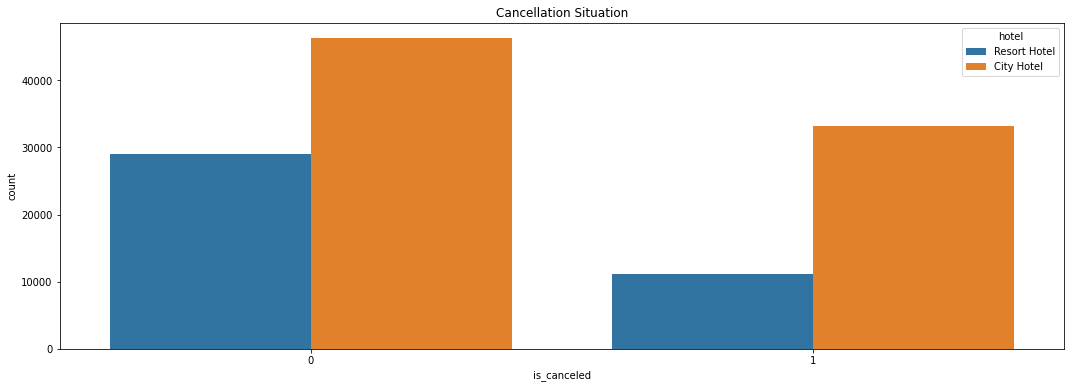

In [7]:
plt.figure(figsize=(18,6))
sns.countplot(x='is_canceled', hue = 'hotel', data= hotel_eda)
plt.title('Cancellation Situation')
plt.show()

- City Hotel has the highest canceled booked and also the highest that not canceled booked.

In [8]:
hotel_eda['is_canceled'].value_counts()/hotel.shape[0]*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

- The difference ratio(rapport) between canceled and not canceled indicate imbalanced(déséquilibrée) data:
    - Not Canceled: 62,96%
    - Canceled: 37,04%

### Customer Profiling

In [8]:
hotel_eda['all_child'] = hotel_eda['children'] + hotel_eda['babies']#number of children and babies
pd.crosstab(hotel_eda['adults'], hotel_eda['all_child'], margins=True, margins_name = 'Total')

all_child,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81557,4658,3369,91,0,2,89677
3,5665,495,41,0,0,0,6201
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


In [10]:
hotel_eda.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'all_child'],
      dtype='object')

Judging from the data above, as many as 4175 adults came and without bring any children as many as 3777. There is a possibility that they have a business purpose or a couple who are on honeymoon.

- À en juger par les données ci-dessus, pas moins de 4175 adultes sont venus et sans emmener d'enfants jusqu'à 3777. Il est possible qu'ils aient un but commercial ou un couple en lune de miel.

In second place were adults who came alone as many as 654 people and who did not bring children as many as 642 people. It is possible to have a business purpose.

- En second lieu, il y avait des adultes qui sont venus seuls jusqu'à 654 personnes et qui n'ont pas amené d'enfants jusqu'à 642 personnes. Il est possible d'avoir un objectif commercial.

For adults who come more than 4 adults, no one brings a single child. There is the possibility of having a business trip or traveling.

- Pour les adultes qui viennent plus de 4 adultes, personne n'amène un seul enfant. Il y a la possibilité de faire un voyage d'affaires ou de voyager.

In [11]:
4175 + 3777

7952

In [12]:
22577 + 5665

28242

In [13]:
hotel_eda['all_child'].value_counts()

0.0     110054
1.0       5446
2.0       3772
3.0        111
10.0         2
9.0          1
Name: all_child, dtype: int64

In [14]:
hotel_eda['adults'].max()#.value_counts()

55

In [15]:
hotel_eda['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

#### All Child
- In the data above, the majority of adults who came without bringing children were 4560, followed by those who brought 1 child as many as 237 adults and 2 children as many as 201 adults.

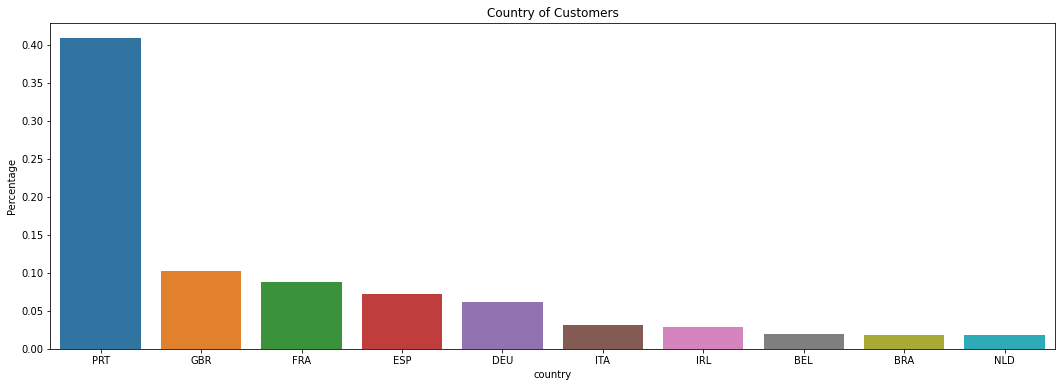

In [16]:
plt.figure(figsize=(18,6))
country_booking = hotel_eda['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
sns.barplot(x='country', y='Percentage', data=country_booking.head(10))
plt.title('Country of Customers')
plt.show()

In [17]:
hotel_eda['country'].value_counts().head(10)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [18]:
country_booking

,country,Percentage
0,PRT,0.408656
1,GBR,0.102008
2,FRA,0.087593
3,ESP,0.072059
4,DEU,0.061286
...,...,...
172,PYF,0.000008
173,NCL,0.000008
174,ASM,0.000008
175,SLE,0.000008


- Categories are represented in the ISO 3155–3:2013 format.
- PRT or Portugal has the most booking demand based on the data (more than 40%). It is pretty obvious because if we trace to the publication page, the description tells us that the data source locations are from hotels located in Portugal.

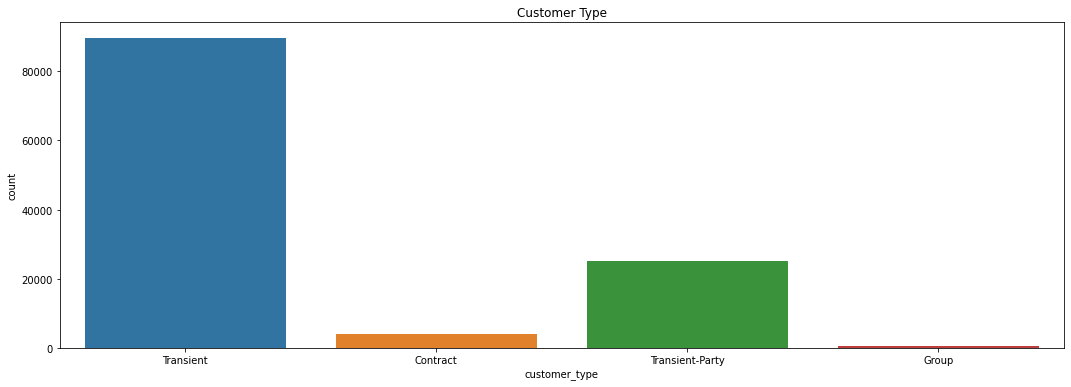

In [19]:
plt.figure(figsize=(18,6))
sns.countplot(x='customer_type', data= hotel_eda)
plt.title('Customer Type')
plt.show()

In [20]:
hotel_eda['customer_type'].value_counts()/len(hotel_eda['customer_type'])*100

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64

Type of booking, assuming one of four categories:
- Contract, when the booking has an allotment or other type of contract associated to it
- Group, when the booking is associated to a group
- Transient, when the booking is not part of a group or contract, and is not associated to other transient booking
- Transient-party, when the booking is transient, but is associated to at least other transient booking

From the graph:
- Transient as much as 75.05%
- Transient-party as much as 21.04%
- Contract as much as 3.41%
- Group as much as 0.48%

Most of customers is Transient, means they are walk-in guests, last-minute or bookers, or simply people that require a very short-term stay in your facility. Transient customers are one of the major market segments consist of individuals or groups.

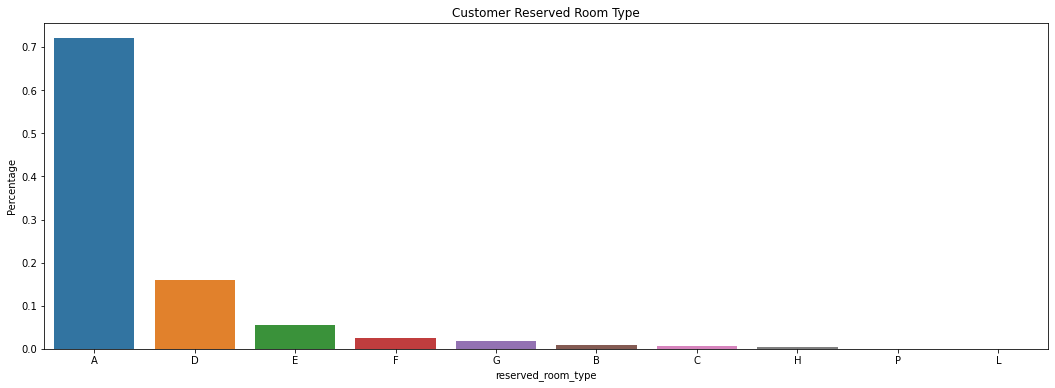

In [21]:
plt.figure(figsize=(18,6))
room_booking = hotel_eda['reserved_room_type'].value_counts(normalize=True).rename_axis('reserved_room_type').reset_index(name='Percentage')
sns.barplot(x='reserved_room_type', y='Percentage', data= room_booking)
plt.title('Customer Reserved Room Type')
plt.show()

<AxesSubplot:xlabel='customer_type', ylabel='count'>

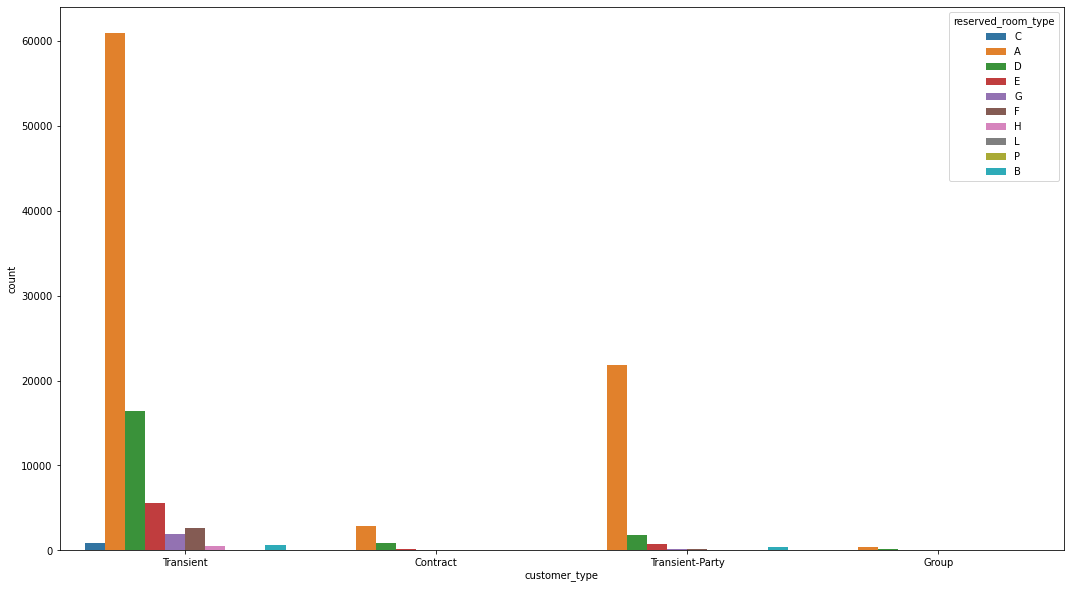

In [22]:
plt.figure(figsize=(18,10))
sns.countplot(data=hotel_eda,x='customer_type',hue='reserved_room_type')

In [23]:
hotel_eda.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'all_child'],
      dtype='object')

In [24]:
hotel_eda['reserved_room_type'].value_counts()/len(hotel_eda['reserved_room_type'])*100

A    72.027808
D    16.082586
E     5.473658
F     2.426501
G     1.753916
B     0.936427
C     0.780635
H     0.503392
P     0.010051
L     0.005026
Name: reserved_room_type, dtype: float64

- Type of Reserved Room is A, D, E, G, C, F, H, L, P. Code is presented instead of designation for anonymity reasons.
- Most of customers book the type A room more than 70%.

### Customer Behavior (comportement)

In [25]:
hotel_eda['meal'].value_counts()/len(hotel_eda['meal'])*100 #meal = repas

BB           77.318033
HB           12.114080
SC            8.920345
Undefined     0.979144
FB            0.668398
Name: meal, dtype: float64

Type of meal booked. Categories are presented in standard hospitality meal packages: 
- BB means Bed & Breakfast as much as 77.31%
- HB means Half board (breakfast and one other meal – usually dinner) as much as 12.11%
- FB means Full board (breakfast, lunch and dinner) as much as 0.66%
- Undefined/SC means no meal as much as 9.89%

Most customers prefer to book include Breakfast, which's the usual complimentary if someone wants to book a hotel. In case they don't have time to find breakfast outside the hotel. Some of them around 12.11% book with another meal, usually dinner. Them who came with business interests can get more resting time to not find any dinner outside hotel anymore.

In [26]:
hotel_eda['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

- NO Deposit = pas deposé
- Non Refund = pas remboursé
- refundable = remboursé

In [27]:
hotel_eda['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [28]:
hotel_eda.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'all_child'],
      dtype='object')

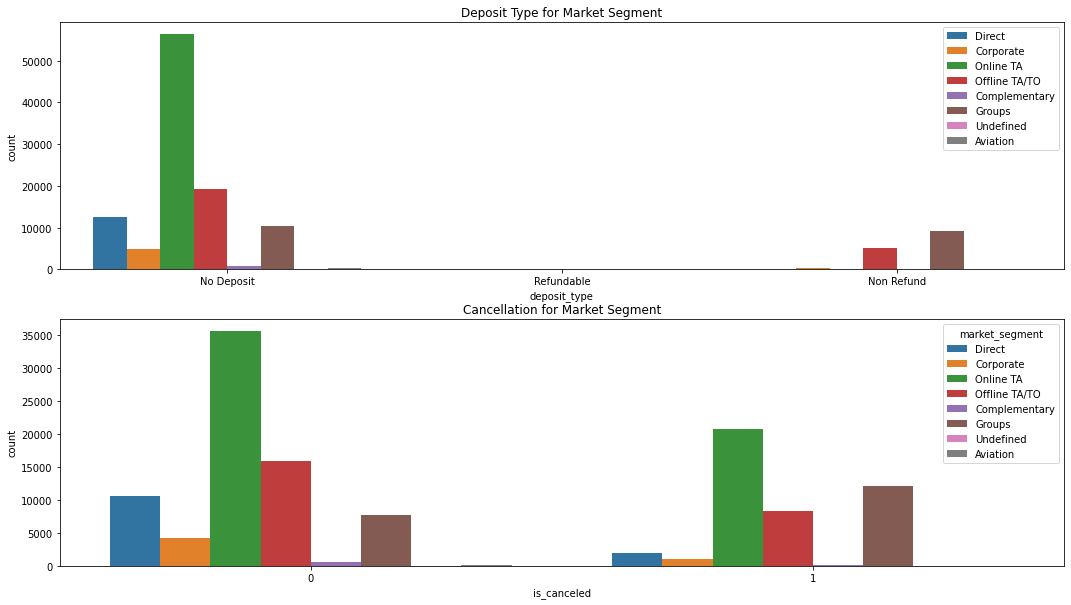

In [29]:
#Who of market-segment is in majoritary of deposit_type
#who of market-segment is in majoritary canceled or not

plt.figure(figsize=(18,10))
plt.subplot(211)
sns.countplot(data=hotel_eda,x='deposit_type',hue='market_segment')
plt.title('Deposit Type for Market Segment')
plt.legend(loc = 1)
plt.subplot(212)
sns.countplot(data=hotel_eda,x='is_canceled',hue='market_segment')
plt.title('Cancellation for Market Segment')
plt.show()



#### Deposit Type for Market Segment
- The highest book is using Online TA, with No Deposit. While Groups and Offline TA/TO are next with Refundable and Non refund. In this era, it will be easy to book a hotel using Online TA, especially most Online TA offers the customers without deposit facility. Customers can choose any type of room up to any special request by Online TA.
- Looking at Offline TA/TO and Groups, the situations where the deposit was received were only in the scenarios where the groups came. It is quite logical to apply a deposit for a large number of customers who will fill important amount of the hotel capacity.

#### Cancellation for Market Segment
- The highest cancellation book is using Online TA. Most of Online TA give a customers previllege to cancel without any charge apply. Second, Groups segment has cancellation rate around 50%.

In [30]:
hotel_eda.shape

(119390, 33)

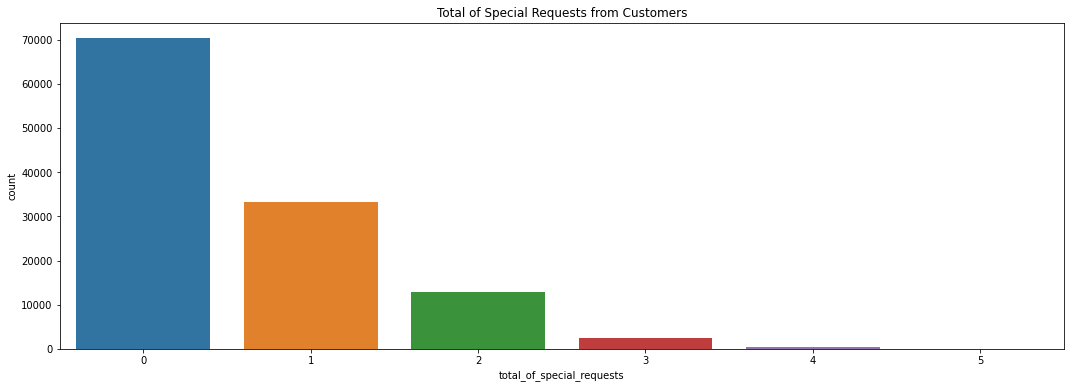

In [31]:
plt.figure(figsize=(18,6))
sns.countplot(x='total_of_special_requests', data= hotel_eda)
plt.title('Total of Special Requests from Customers')
plt.show()

In [32]:
hotel_eda['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

- total_of_special_requests => Number of special requests made by the customer (e.g. twin bed or high floor)

- Most customers don't make any special requests. It has a correlation with customer type. They don't ask for any additional requests because they only transient customers.

# Data Cleaning

In [33]:
hotel.isna().sum()/len(hotel)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

* There are missing values and it will be processed on ColumnTransformer.

# PreProcessing

*Preprocessing Scheme*

- OneHot: hotel, meal, market_segment, distribution_channel, reserved_room_type, deposit_type, customer_type
- Binary:
    * mode: country (country column more than 10 countries, soI decide to use binary)
- Mode Impute: children
- PassThrough: adults, babies, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests
- Target: is_canceled
- No need to scale the data because there isn't any interval nominal between columns

In [34]:
hotel_eda['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PYF        1
NCL        1
ASM        1
SLE        1
GUY        1
Name: country, Length: 177, dtype: int64

In [9]:
mode_binary = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('binary', BinaryEncoder())])
#SimpleImputer = replacement des valeur manquant

In [10]:
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), [ 'hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']),
    ('mode binary', mode_binary, ['country']),
    ('impute mode', SimpleImputer(strategy = 'most_frequent'), ['children'])], remainder = 'passthrough')

In [65]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['hotel', 'meal', 'market_segment',
                                  'distribution_channel', 'reserved_room_type',
                                  'deposit_type', 'customer_type']),
                                ('mode binary',
                                 Pipeline(steps=[('encoder',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', BinaryEncoder())]),
                                 ['country']),
                                ('impute mode',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['children'])])

In [11]:
hotel = pd.read_csv('hotel_bookings.csv', usecols = ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'])

In [38]:
hotel.shape

(119390, 16)

In [39]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['hotel', 'meal', 'market_segment',
                                  'distribution_channel', 'reserved_room_type',
                                  'deposit_type', 'customer_type']),
                                ('mode binary',
                                 Pipeline(steps=[('encoder',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', BinaryEncoder())]),
                                 ['country']),
                                ('impute mode',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['children'])])

In [40]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   adults                       119390 non-null  int64  
 3   children                     119386 non-null  float64
 4   babies                       119390 non-null  int64  
 5   meal                         119390 non-null  object 
 6   country                      118902 non-null  object 
 7   market_segment               119390 non-null  object 
 8   distribution_channel         119390 non-null  object 
 9   reserved_room_type           119390 non-null  object 
 10  booking_changes              119390 non-null  int64  
 11  deposit_type                 119390 non-null  object 
 12  days_in_waiting_list         119390 non-null  int64  
 13 

### *Define Target Data*

In [12]:
hotel['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [13]:
X = hotel.drop('is_canceled', axis = 1)
y = hotel['is_canceled']

* *0 = Not Canceled*
* *1 = Canceled*

        - TN: Guest's predict with Not Canceled and the actual is Not Canceled
        - TP: Guest's predict with Canceled and the actual is Canceled
        - FP: Guest's predict with Canceled and the actual is Not Canceled
        - FN: Guest's predict with Not Canceled and the actual is Canceled

- TN : Prédiction de l'invité avec Non annulé et le réel n'est pas annulé
- TP : Prédiction de l'invité avec Annulé et le réel est Annulé
- FP : Prédiction de l'invité avec Annulé et le réel n'est pas annulé
- FN : Prédiction du client avec Non annulé et le réel est annulé

Actions:
* FP: When the customer arrives, the room is not available. Customers won't book at the hotel again because they are considered to provide poor service, the hotel experiences financial losses, and a good name.
* FN: The hotel has the advantage of empty rooms because it's canceled. Customers have more previlledge to choose facilities if they want.

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - 

* FP: A l'arrivée du client, la chambre n'est pas disponible. Les clients ne réserveront plus à l'hôtel car ils sont considérés comme fournissant un service médiocre, l'hôtel subit des pertes financières et une bonne réputation.

* FN: L'hôtel a l'avantage de disposer de chambres vides car il est annulé. Les clients sont plus enclins à choisir les installations s'ils le souhaitent. 

# I want to reduce one of the situations and its FP. The score that will be pressed is the precision score.

*Splitting Data*

In [16]:
X.shape

(119390, 15)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1515)

- I use 0.2 as default score for test_size and X.shape for random_state so the data will be devided equally.

# Modeling

*Define Model*
- I use 3 basic models to predict:
    * Logistic Regression
    * Decision Tree Classifier
    * K-Nearest Neighbor (I add scaler because usually, the score will be better if using a scaler)

### Cross Validation

In [18]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 1515)
knn = KNeighborsClassifier()

In [19]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('scale', MinMaxScaler()), ('knn', knn)])

In [47]:
logreg_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('mode binary',
                                                  Pipeline(steps=[('encoder',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
      

In [48]:
def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

In [49]:
logreg_pipe_cv = model_evaluation(logreg_pipe, 'precision')
tree_pipe_cv = model_evaluation(tree_pipe, 'precision')
knn_pipe_cv = model_evaluation(knn_pipe, 'precision')

/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype ins

In [50]:
for model in [logreg_pipe, tree_pipe, knn_pipe]:
    model.fit(X_train, y_train)

/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype ins

In [51]:
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std()]
score_precision_score = [precision_score(y_test, logreg_pipe.predict(X_test)), precision_score(y_test, tree_pipe.predict(X_test)), precision_score(y_test, knn_pipe.predict(X_test))]

In [52]:
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier']

In [53]:
cv_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'precision score': score_precision_score})

In [54]:
cv_summary

,method,mean score,std score,precision score
0,Logistic Regression,0.774225,0.005941,0.774735
1,Decision Tree Classifier,0.756932,0.005728,0.762241
2,KNN Classifier,0.737620,0.004771,0.721038


- From this method, I will choose Logistic Regression	 because it has the highest precision score and continue to HyperParameter Tuning process.

# HyperParam Tuning

In [55]:
estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])

In [57]:
hyperparam_space = {
    'model__C': [1, 5, 10, 20, 30, 50],
    'model__class_weight': ['dict', 'balanced'],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'model__max_iter': [50, 100, 150, 200, 300],
    'model__random_state': [1515],
    'model__n_jobs': [-1]
}

In [58]:
random = RandomizedSearchCV(
                estimator,
                param_distributions = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'precision',
                n_iter = 10,
                n_jobs = -1)

In [59]:
random.fit(X_train, y_train)

/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['hotel',
                                                                                'meal',
                                                                                'market_segment',
                                                                                'distribution_channel',
                                                                                'reserved_room_

In [60]:
print('best score', random.best_score_)
print('best param', random.best_params_)

best score 0.7824689407814781
best param {'model__solver': 'saga', 'model__random_state': 1515, 'model__n_jobs': -1, 'model__max_iter': 100, 'model__class_weight': 'dict', 'model__C': 1}


- So far, the best parameter is:
    * solver: saga
    * max_iter: 50
    * class_weight: dict
    * C: 20

# Before and After Tuning

In [61]:
estimator.fit(X_train, y_train)
y_pred_estimator = estimator.predict(X_test)
before = precision_score(y_test, y_pred_estimator)

/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
random.best_estimator_.fit(X_train, y_train)
y_predict = random.best_estimator_.predict(X_test)
after = precision_score(y_test, y_predict)

/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/bob/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [63]:
score_list = [before, after]
method_name = ['Logistic Regression Before Tuning', 'Logistic Regression After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})

In [64]:
best_summary

,method,score
0,Logistic Regression Before Tuning,0.774735
1,Logistic Regression After Tuning,0.788182


After tuning process, the precision score increasing. I decide to use Logistic Regression After Tuning to predict hotel cancellation.